### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They have the following question: what’s likely to make the employee leave the company?

The goal in this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

### Familiarize yourself with the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Import packages

In [2]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,\
ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier 
from xgboost import XGBRegressor
from xgboost import plot_importance

## Load dataset

In [4]:
# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Data Exploration (EDA and data cleaning)




In [4]:
# Gathering basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Gathering descriptive statistics about the data

df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

In [6]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed

df0 = df0.rename(columns = {'Work_accident' : 'work_accident',
                           'average_montly_hours': 'average_monthly_hours',
                           'time_spend_company' : 'tenure', 
                           'Department' : 'department'})
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking for missing values

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Checking for duplicates

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspecting some rows containing duplicates as needed
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [11]:
# Dropping the duplicates and saving the resulting dataframe in a new variable.
df1 = df0.drop_duplicates(keep = 'first')

df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Checking for outliers

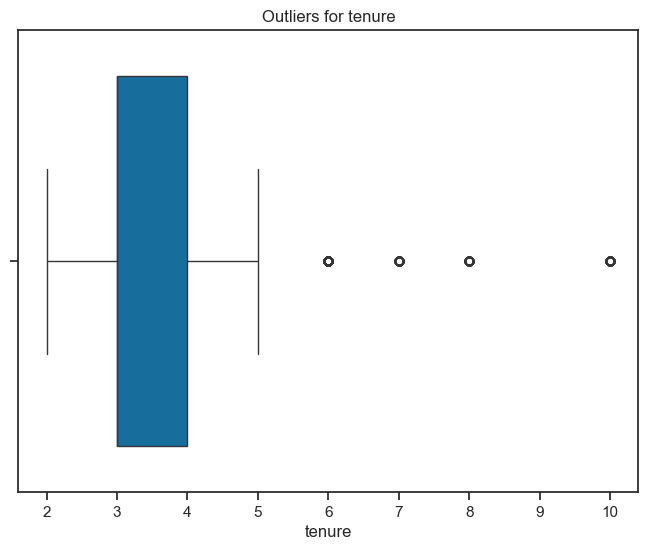

In [12]:
# Creating a boxplot to visualize distribution of `tenure` and detecting any outliers
plt.figure(figsize = (8, 6))
plt.title('Outliers for tenure')
sns.boxplot(x = df1['tenure'])
plt.show()

In [13]:
# Determining the number of rows containing outliers

perc_25 = df1['tenure'].quantile(0.25)
perc_75 = df1['tenure'].quantile(0.75)

iqr = perc_75 - perc_25

ul = perc_75 + 1.5 * iqr  # upper limit
ll = perc_25 - 1.5 * iqr  # lower limit

print('Upper limit: ', ul)
print('Lower limit: ', ll)

outliers = df1[(df1['tenure'] > ul) | (df1['tenure'] < ll)]
print('No. of rows in data containing outliers', len(outliers))

Upper limit:  5.5
Lower limit:  1.5
No. of rows in data containing outliers 824


Certain types of models are more sensitive to outliers than others. We will consider to wether to remove or keep th outliers based on the type of model we decide to use.

In [14]:
# Number of people who left vs. stayed

print(df1['left'].value_counts())

# Percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize = True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


## Data visualizations

In [15]:
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. 

So, we could start by creating a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

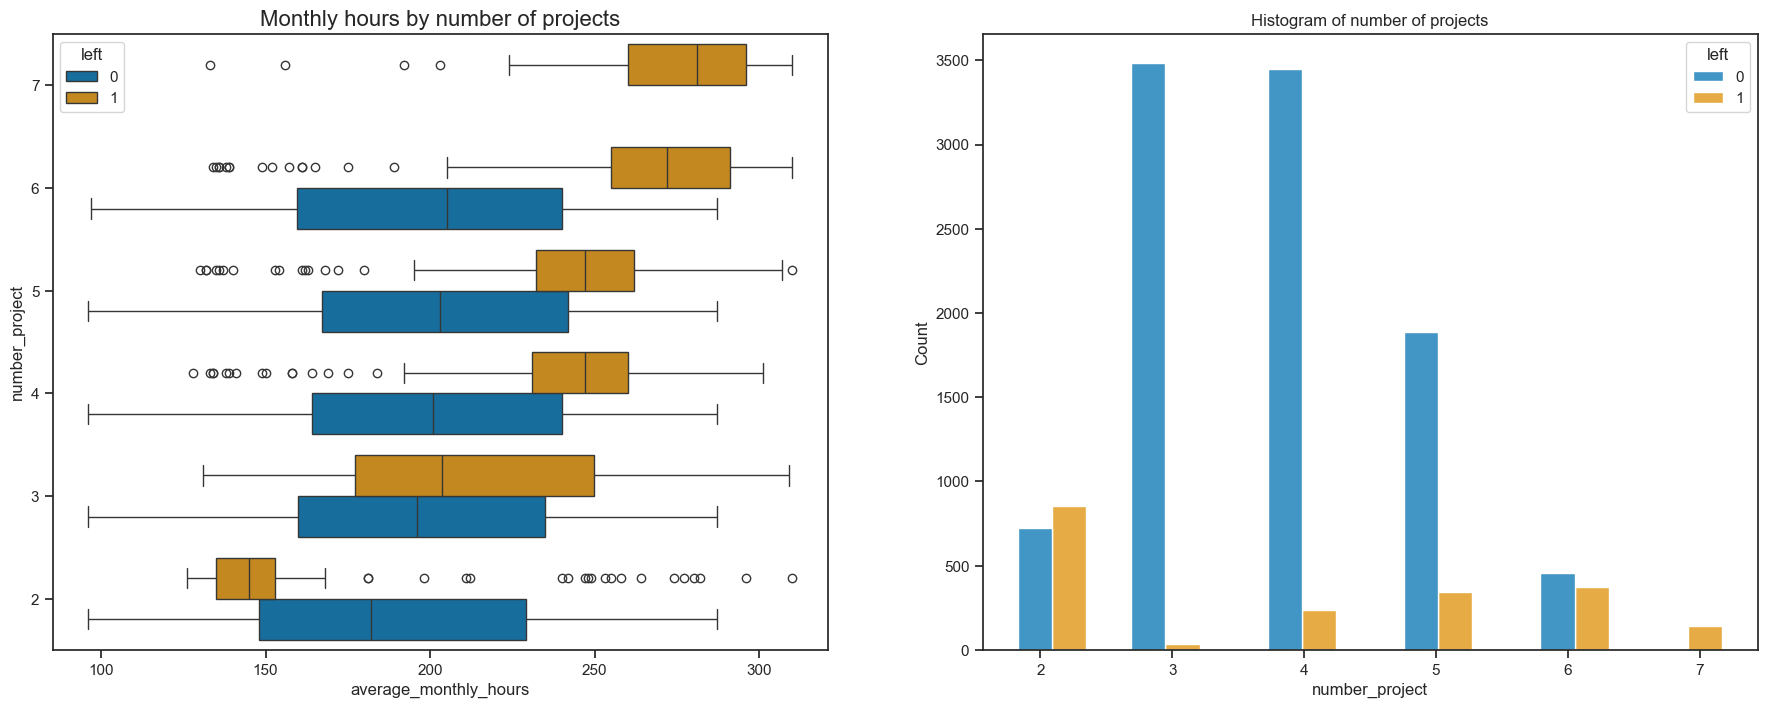

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = ax[0])
ax[0].set_title('Monthly hours by number of projects', fontsize = '16')
ax[0].invert_yaxis()
sns.histplot(data = df1, x = 'number_project', hue = 'left', multiple = 'dodge', ax = ax[1], shrink = 3)
ax[1].set_title('Histogram of number of projects')
plt.show()

All employees with 7 projects left the company. 

In [17]:
df1[df1['number_project'] == 7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Next, we examine the average monthly hours vs the satisfaction levels. 

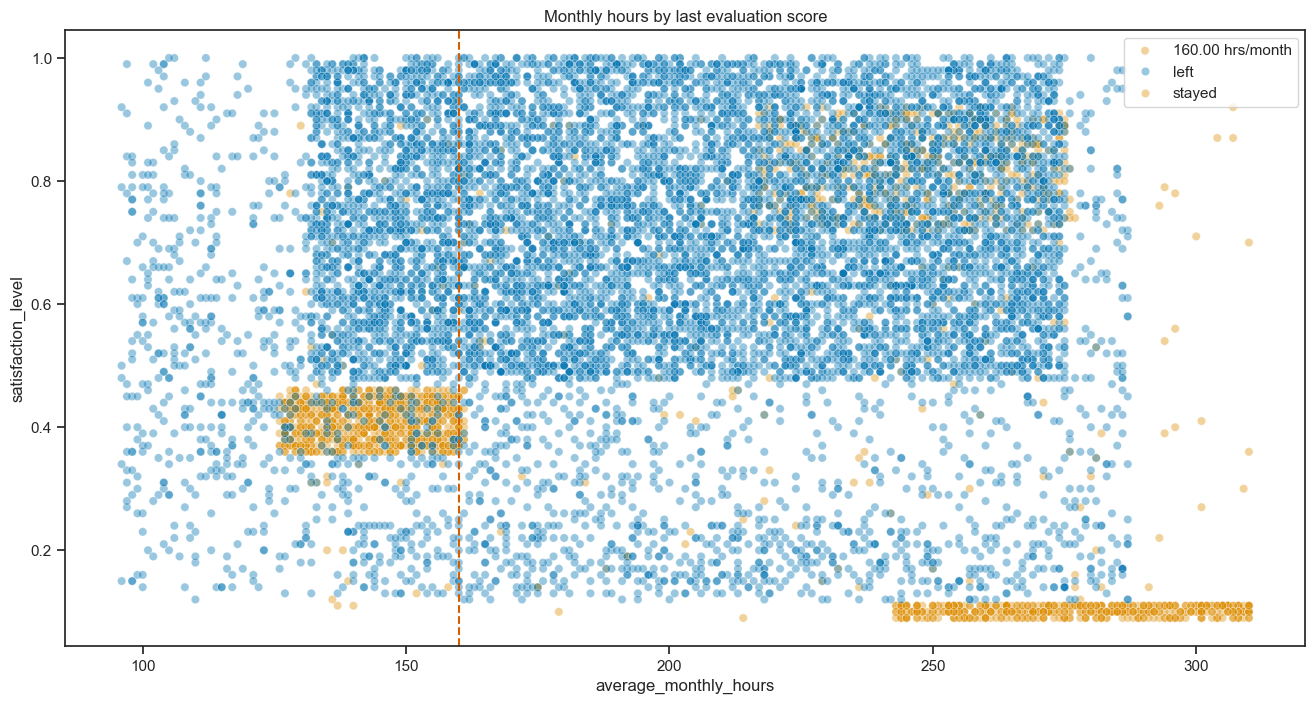

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (16, 8))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.axvline(x = 160, color = 'r', label = '160hrs/ month', ls = '--')
plt.legend(labels = ['160.00 hrs/month', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score');

There is patch on the scatterplot of employees who have worked close to 250-320 hours/ month have a very low satisfaction score and have left the company. On the other hand, there is a dense wider patch on the graph of employees that are working approximately 125-160 hours/ month who have left the company. 

A lighter, less dense patch is also visible of employees who have worked from 225-275 hours month and satisfaction score of 0.7-0.9. 

For the next viusalisation it could be intersting to examine the satisfaction levels by tenure.

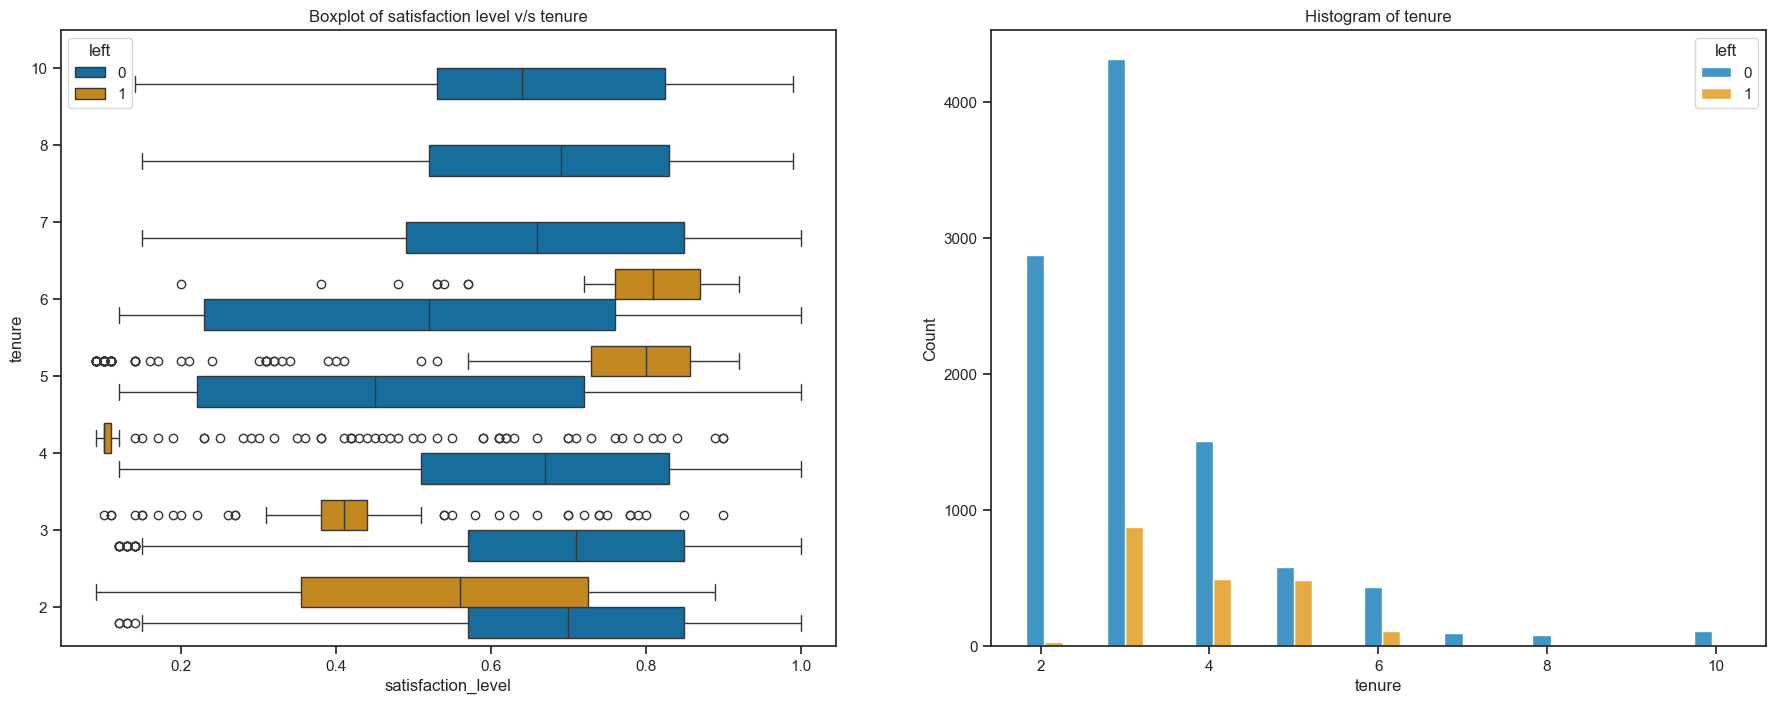

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (22, 8))
sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', hue ='left', ax = ax[0], orient = 'h')
ax[0].set_title('Boxplot of satisfaction level v/s tenure')
ax[0].invert_yaxis()

sns.histplot(data = df1, x = 'tenure', hue = 'left', multiple = 'dodge', ax =ax[1], shrink = 5)
ax[1].set_title('Histogram of tenure')
plt.show()

Next, we caluclate the mean and median of the satisfaction score of the employees who left and those who didn't. 

In [20]:
df1.groupby(['left'])['satisfaction_level'].agg([np.median, np.mean])

/var/folders/br/9gjv2dds5nd4xlbzw83fsfr40000gn/T/ipykernel_7205/972252038.py:1: FutureWarning: The provided callable <function median at 0x107028540> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.median, np.mean])
/var/folders/br/9gjv2dds5nd4xlbzw83fsfr40000gn/T/ipykernel_7205/972252038.py:1: FutureWarning: The provided callable <function mean at 0x106ecf740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.median, np.mean])


median      mean
left                  
0       0.69  0.667365
1       0.41  0.440271

Mean and median of the satisfaction scores of the employees who left are lower than of those that stayed. 

Next, we eaxmine the salary levels for different tenures.

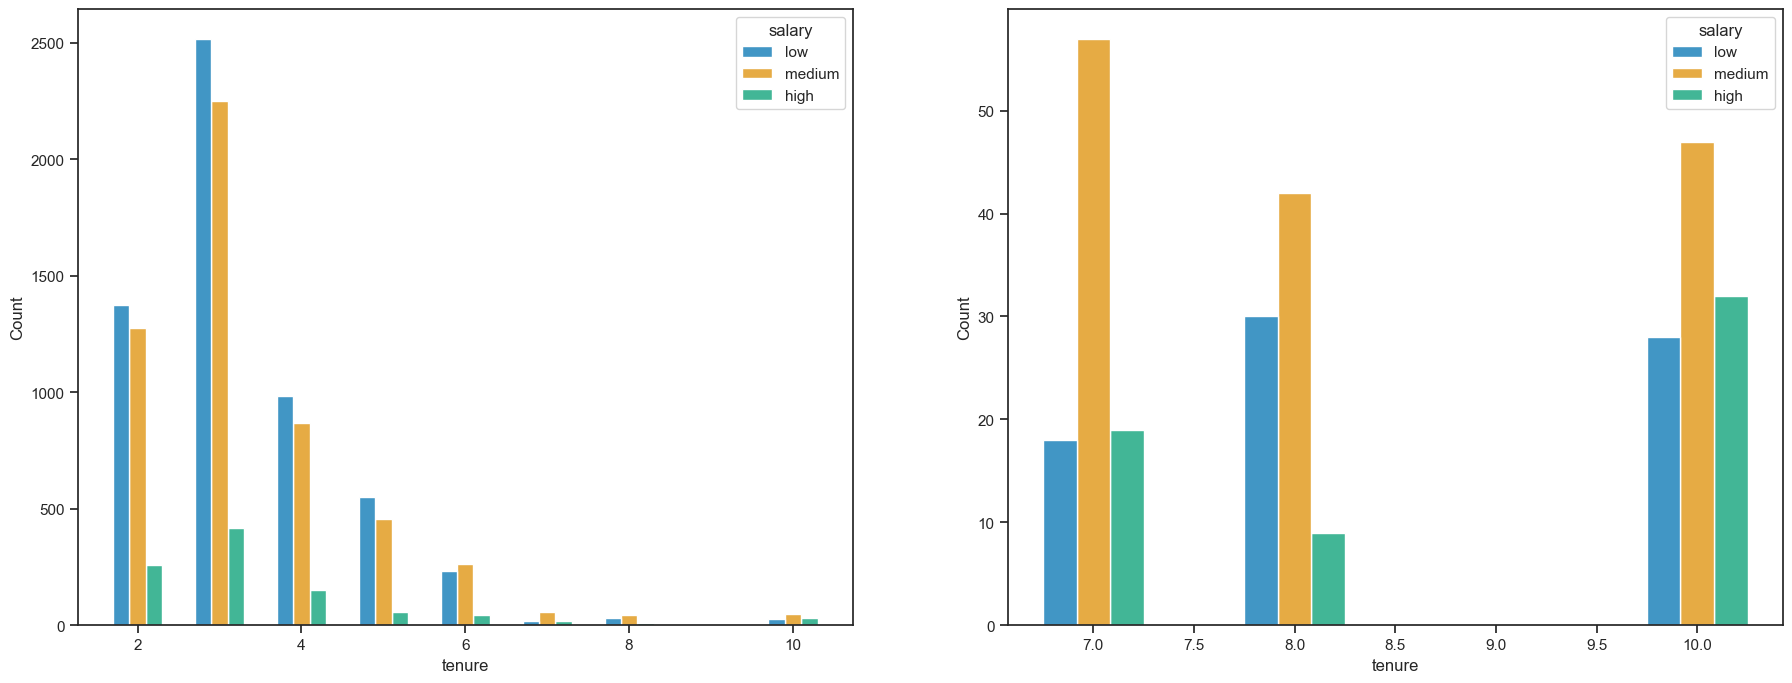

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

tenure_1 = df1[df1['tenure'] > 6]

sns.histplot(data = df1, x = 'tenure', hue = 'salary', hue_order = ['low', 'medium', 'high'], multiple = 'dodge',
            shrink = 0.6, ax = ax[0], discrete=1)

sns.histplot(data = tenure_1, x = 'tenure', hue = 'salary', hue_order = ['low', 'medium', 'high'], multiple = 'dodge',
             shrink = 0.5, discrete=1, ax = ax[1])

plt.show()

Next, we explore whether there is correlation between working long hours and recieving high evaluation scores. We do that by creating a scatterplot of average monthly hours and last evaluation. 

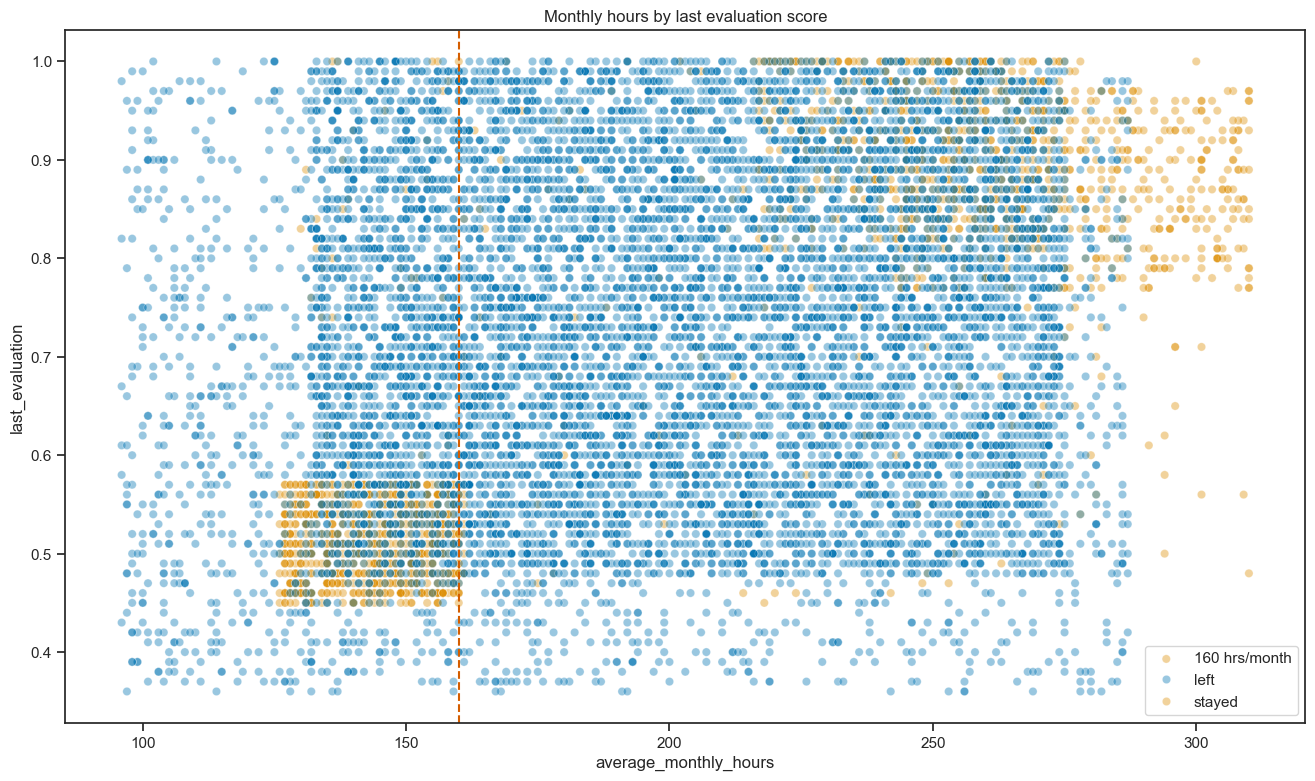

In [22]:
plt.figure(figsize = (16, 9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.4)
plt.axvline(x = 160, color = 'r', label = '160.00 hrs/ month', ls = '--')
plt.legend(labels = ['160 hrs/month', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score');

Now, we examine whether the empployees who worked longer hours recieved a promotion in the last 5 years or not.

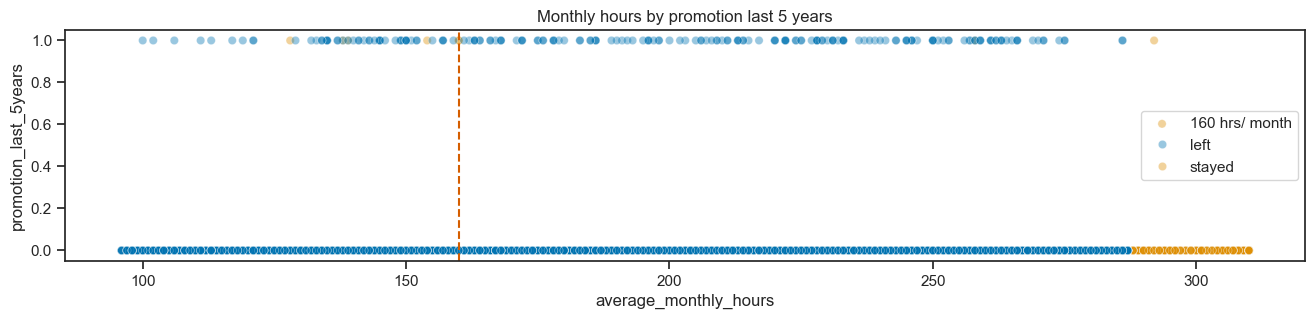

In [23]:
plt.figure(figsize = (16, 3))
sns.scatterplot(data = df1, x = 'average_monthly_hours',  y = 'promotion_last_5years', hue = 'left', alpha = 0.4)
plt.axvline(x = 160, color = 'r', ls = '--')
plt.legend(labels = ['160 hrs/ month', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years');

All employees with no promotion in the last 5 years and working over 280 hours+ per month have left the company. 

Next, we inspect how the employees who left are distributed across the departments.

In [24]:
# Displaying the counts foe each department.

df1['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

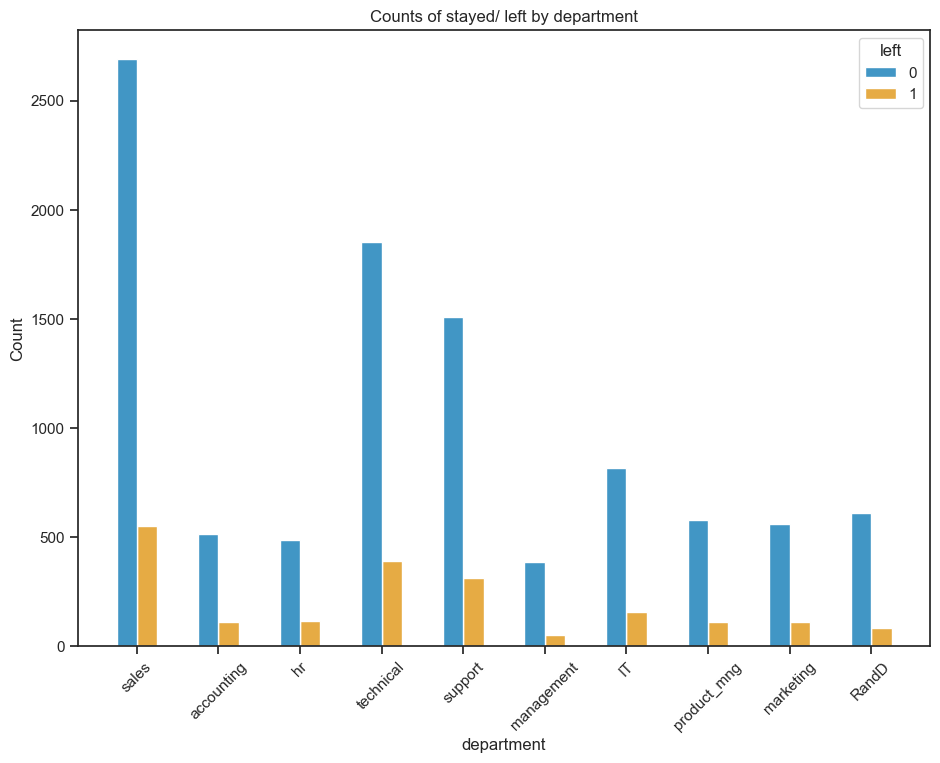

In [25]:
plt.figure(figsize = (11, 8))
sns.histplot(data = df1, x = 'department', hue = 'left', hue_order = [0, 1], discrete = 1, multiple = 'dodge',
            shrink = 0.5)
plt.xticks(rotation = 45)
plt.title('Counts of stayed/ left by department');

Lastly, we check for strong correlations between variables in the data.

In [30]:
df0.corr(numeric_only=True) # converting variables to numeric to plot the heatmap. 

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_monthly_hours           -0.020048         0.339742        0.417211   
tenure                          -0.100866         0.131591        0.196786   
work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_monthly_hours    tenure  work_accident  \
satisfaction_level                 -0.020048 -0.100866       0.058697   
last_evaluation                     0.339742  0.131591      -0.007104   
number_project                      0.417211  0.196786      -0.004741   
average_monthly_hours               1.000000  0.127755      -0.010143   
tenure                              0.127755  1.000000       0.002120   
work_accident                      -0.010143  0.002120       1.000000   
left                                0.071287  0.144822      -0.154622   
promotion_last_5years              -0.003544  0.067433       0.039245   

                           left  promotion_last_5years  
satisfaction_level    -0.388375               0.025605  
last_evaluation        0.006567              -0.008684  
number_project         0.023787              -0.006064  
average_monthly_hours  0.071287              -0.003544  
tenure                 0.144822               0.067433  
work_accident         -0.154622               0.039245  
left                   1.000000              -0.061788  
promotion_last_5years -0.061788               1.000000

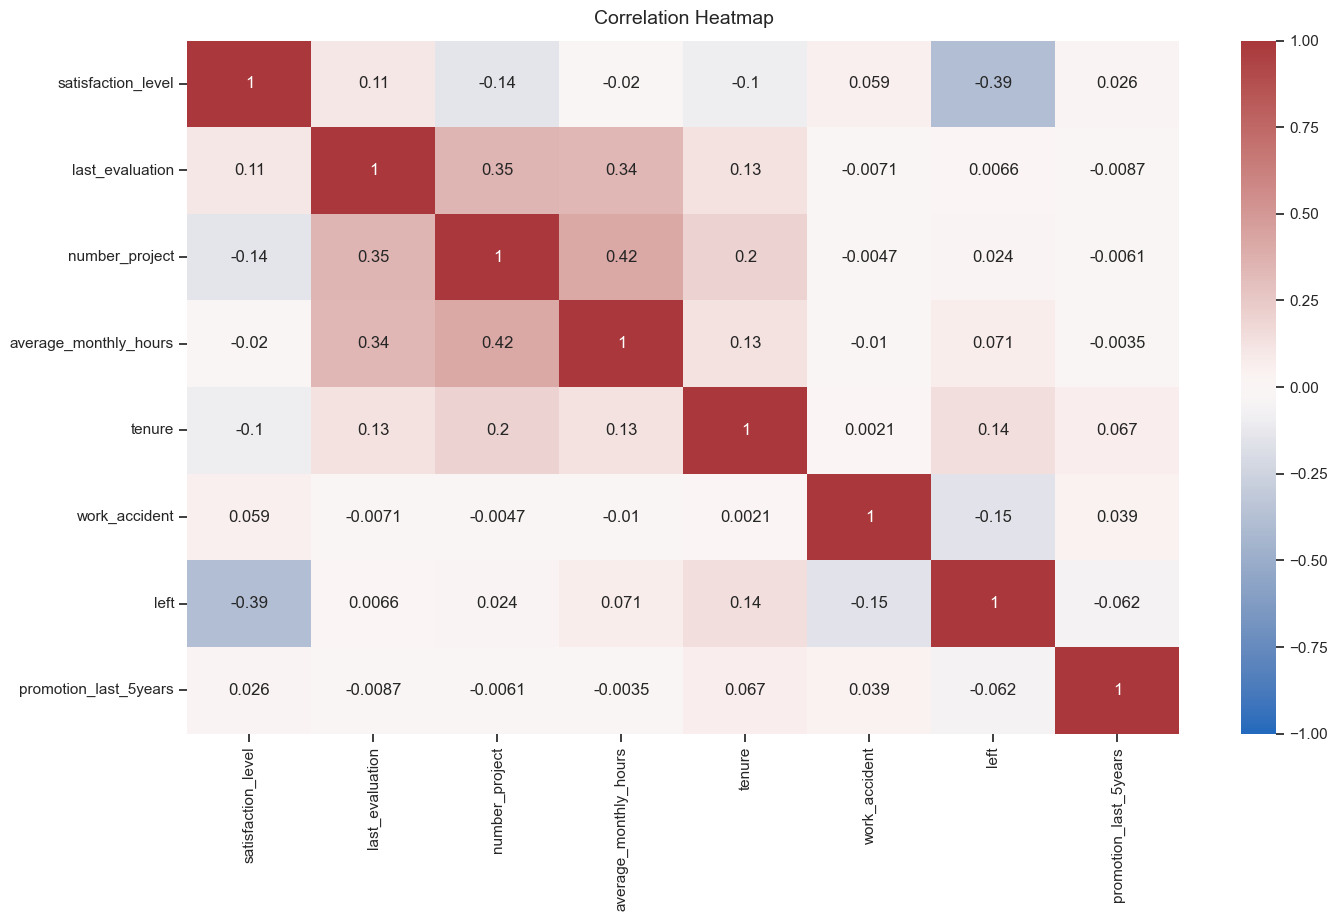

In [32]:
plt.figure(figsize = (16, 9))
heatmap = sns.heatmap(df0.corr(numeric_only=True), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette('vlag', as_cmap = True))
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 14}, pad = 12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

## Model Building


### Logistic Regression


In [33]:
df_enc = df1.copy()

df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
                   )
df_enc = pd.get_dummies(df_enc, drop_first = False)

df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

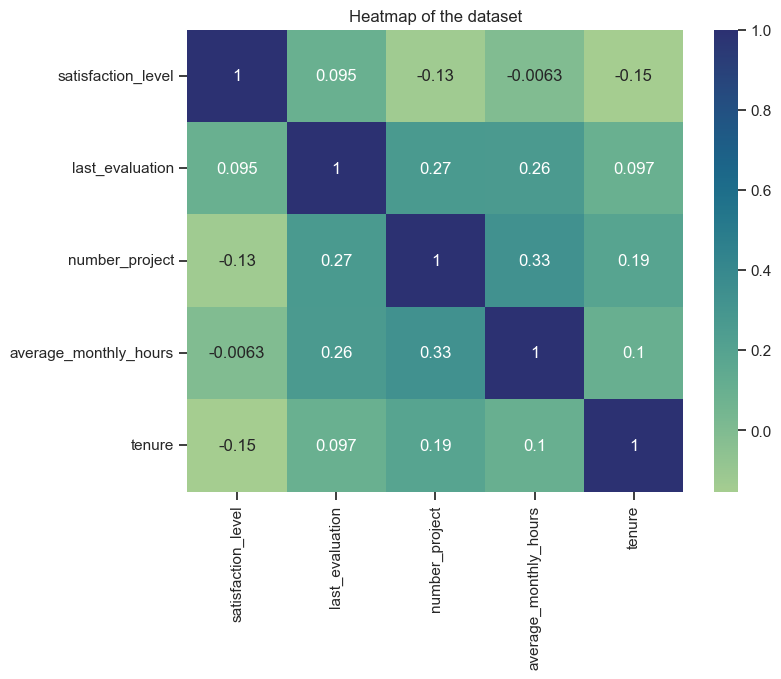

In [34]:
plt.figure(figsize = (8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
           .corr(), annot = True, cmap = 'crest')
plt.title('Heatmap of the dataset')
plt.show()

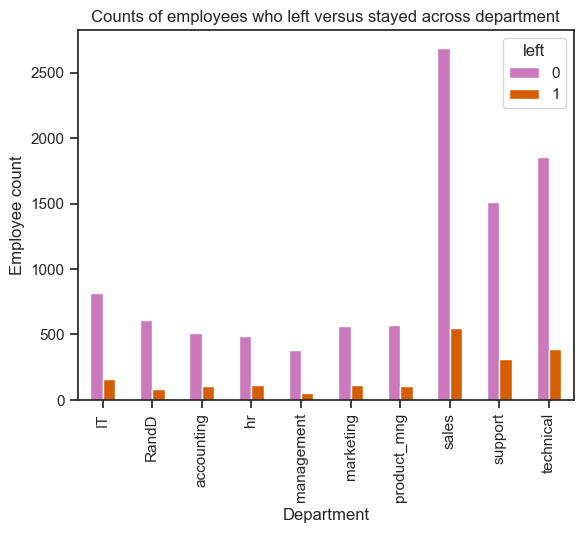

In [35]:
# Creating a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (pink color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind = 'bar', color = 'mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [36]:
df_logreg = df_enc[(df_enc['tenure'] >= ll) & (df_enc['tenure'] <= ul)]
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [37]:
y = df_logreg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [38]:
# Isolating the outcome variable

X = df_logreg.drop('left', axis = 1)
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

Splitting of the data into training set and testing set. We will use stratify based on the values in y, since the classes are unbalanced.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [50]:
# Constructing a logistic regression model and fitting it to the training dataset

log_clf = LogisticRegression(random_state = 42, max_iter = 1000).fit(X_train, y_train)

In [51]:
# Using the logistic regression model to get predictions on the test set

y_pred = log_clf.predict(X_test)

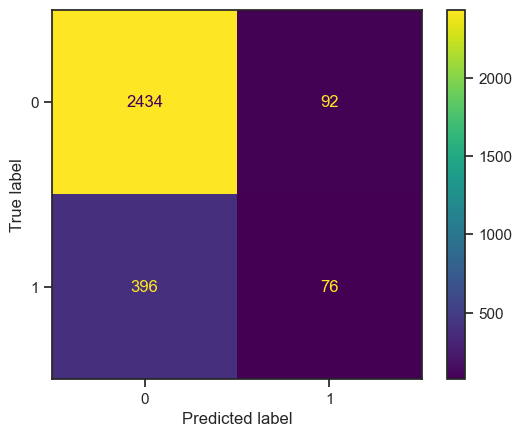

In [52]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, 
                                 display_labels = log_clf.classes_)
log_disp.plot(values_format = '')
plt.show()

Checking the class balance in the data. 

In [53]:
df_logreg['left'].value_counts(normalize = True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

Since the imabalance is not too severe, we can proceed wihout modifying the class balance.

In [54]:
# Creating a classification report for the logistic regression model.
target_names = ['Predict leaving', ' Predict staying']
print(classification_report(y_test, y_pred, target_names = target_names))

                  precision    recall  f1-score   support

 Predict leaving       0.86      0.96      0.91      2526
 Predict staying       0.45      0.16      0.24       472

        accuracy                           0.84      2998
       macro avg       0.66      0.56      0.57      2998
    weighted avg       0.80      0.84      0.80      2998



## Tree-based model

In [55]:
y = df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [56]:
# Selecting the features.
X = df_enc.drop('left', axis = 1)
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
1       6              0                      0       1          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Splitting the data into training, testing and validation sets.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Decision tree: Round 1

In [60]:
# Initiating the model
tree = DecisionTreeClassifier(random_state = 0)
cv_params = {'max_depth' : [4, 6, 8, None], 
            'min_samples_leaf' : [2, 5, 1], 
            'min_samples_split' : [2, 4, 6]}
scoring = {'accuracy' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1' : 'f1',
        'roc_auc' : 'roc_auc'}
#Initiating a GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

Fitting decision tree model into the training data. 

In [61]:
%time
tree1.fit(X_train, y_train)

CPU times: user 6 μs, sys: 13 μs, total: 19 μs
Wall time: 33.1 μs


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [62]:
# Checking for best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [63]:
# Checking the AUC score on CV.
tree1.best_score_

0.9698382034497465

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, we write a function that will help extracting all the scores from the grid search. 

In [64]:
def make_results(model_name:str, model_object, metric:str):

    #  A dictionary that maps input metric to actual metric name in GridSearchCV

    metric_dict = {'auc': 'mean_test_roc_auc',
                  'precision': 'mean_test_precision',
                  'recall': 'mean_test_recall', 
                  'f1': 'mean_test_f1', 
                  'accuracy': 'mean_test_accuracy'}
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]
    
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                        'precision' : [precision],
                        'recall' : [recall],
                        'F1' : [f1],
                        'Accuracy' : [accuracy],
                        'auc' : [auc]
                        })
    return table

In [65]:
# Getting all the CV scores.
tree1_cv_results = make_results('decision tree cv ', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  Accuracy       auc
0  decision tree cv    0.973531  0.915069  0.943315   0.98143  0.969838

### Random forest: Round 1

In [69]:
# Initiating the model
rf = RandomForestClassifier(random_state = 0)

# Assigning the hyperparameters.
cv_params = {'max_depth': [3, 5, None],
            'max_features': [1.0],
            'max_samples': [0.7 ,1.0],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            'n_estimators': [300, 500]}

scoring = {'accuracy' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1' : 'f1',
        'roc_auc' : 'roc_auc'}
rf1 = GridSearchCV(rf, cv_params, scoring =scoring, cv = 4, refit = 'roc_auc')

In [70]:
# fitting the model into the training set.
%time
rf1.fit(X_train, y_train)

CPU times: user 8 μs, sys: 2 μs, total: 10 μs
Wall time: 13.8 μs


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [71]:
# Checking the best AUC score on CV.
rf1.best_score_

0.9806923046564571

In [72]:
# Checking for best parameters.
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [73]:
# Getting all the CV scores.
rf1_cv_results = make_results('random forest cv ', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

               model  precision    recall        F1  Accuracy       auc
0  decision tree cv    0.973531  0.915069  0.943315   0.98143  0.969838
               model  precision    recall        F1  Accuracy       auc
0  random forest cv     0.95272  0.914408  0.933104  0.977871  0.980692


In [74]:
# Defining a function that gets all the CV socres from the model.
def get_scores(model_name:str, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model' :[model_name],
                         'precision' : [precision], 
                         'recall' : [recall], 
                         'f1' : [f1],
                         'accuracy' : [accuracy],
                         'AUC' : [auc]
                         })
    return table

In [75]:
# Getting the predictions on the test set. 
rf1_test_scores = get_scores('random forest test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest test   0.958515  0.930085  0.944086  0.982655  0.961281

#### Feature Engineering

In [76]:
# Dropping satisfaction level
df2 = df_enc.drop('satisfaction_level', axis = 1)

df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [77]:
# Creating `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspecting max and min average monthly hours values
print('Max hours: ', df2['overworked'].max())
print('Min hours: ', df2['overworked'].min())

Max hours:  310
Min hours:  96


In [78]:
df2 = df2.drop('average_monthly_hours', axis = 1)

df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False         157  
1               False                 False         262  
2               False                 False         272  
3               False                 False         223  
4               False                 False         159

### Decision tree: Round 2

In [79]:
y = df2['left']

X = df2.drop('left', axis = 1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

In [83]:
tree = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth': [4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1 ],
            'min_samples_split': [2, 4, 6]}

scoring = {'accuracy' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1' : 'f1',
        'roc_auc' : 'roc_auc'}

tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [84]:
%time
tree2.fit(X_train, y_train)

CPU times: user 6 μs, sys: 11 μs, total: 17 μs
Wall time: 31 μs


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [85]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [86]:
tree2.best_score_

0.9644617482186636

In [87]:
tree2_cv_results = make_results('decision tree2 cv ', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

               model  precision    recall        F1  Accuracy       auc
0  decision tree cv    0.973531  0.915069  0.943315   0.98143  0.969838
                model  precision    recall        F1  Accuracy       auc
0  decision tree2 cv    0.903449  0.904894  0.903783  0.967975  0.964462


### Random Forest: Round 2

In [90]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth' : [3, 5, None], 
            'max_features' : [1.0],
            'max_samples' : [0.7, 1.0],
            'min_samples_leaf' : [1, 2, 3],
            'min_samples_split' : [2, 3, 4], 
            'n_estimators' : [300, 500]}

scoring = {'accuracy' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1' : 'f1',
        'roc_auc' : 'roc_auc'}

rf2 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [91]:
%time 
rf2.fit(X_train, y_train)

CPU times: user 6 μs, sys: 1 μs, total: 7 μs
Wall time: 14.1 μs


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [92]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [93]:
rf2.best_score_

0.9739674733456629

In [94]:
rf2_cv_results = make_results('random forest2 cv ', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

                model  precision    recall        F1  Accuracy       auc
0  decision tree2 cv    0.903449  0.904894  0.903783  0.967975  0.964462
                model  precision    recall       F1  Accuracy       auc
0  random forest2 cv    0.906207  0.904892  0.90547  0.968642  0.973967


In [95]:
rf2_test_scores = get_scores('random forest2 test ', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest2 test    0.909091  0.903614  0.906344  0.968979  0.942807

Now, we will create a confusion matrix to see how well it predicts on the test set. 

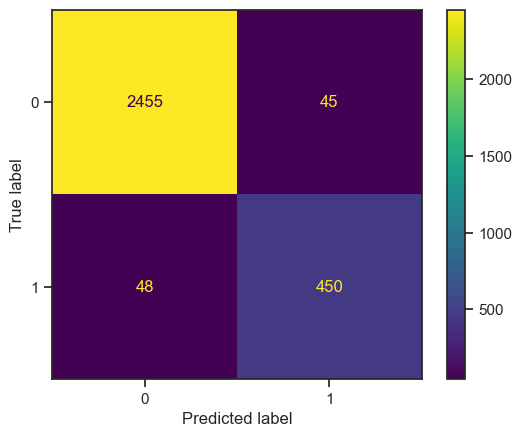

In [96]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf2.classes_)
disp.plot(values_format = '')

#### Decison tree splits

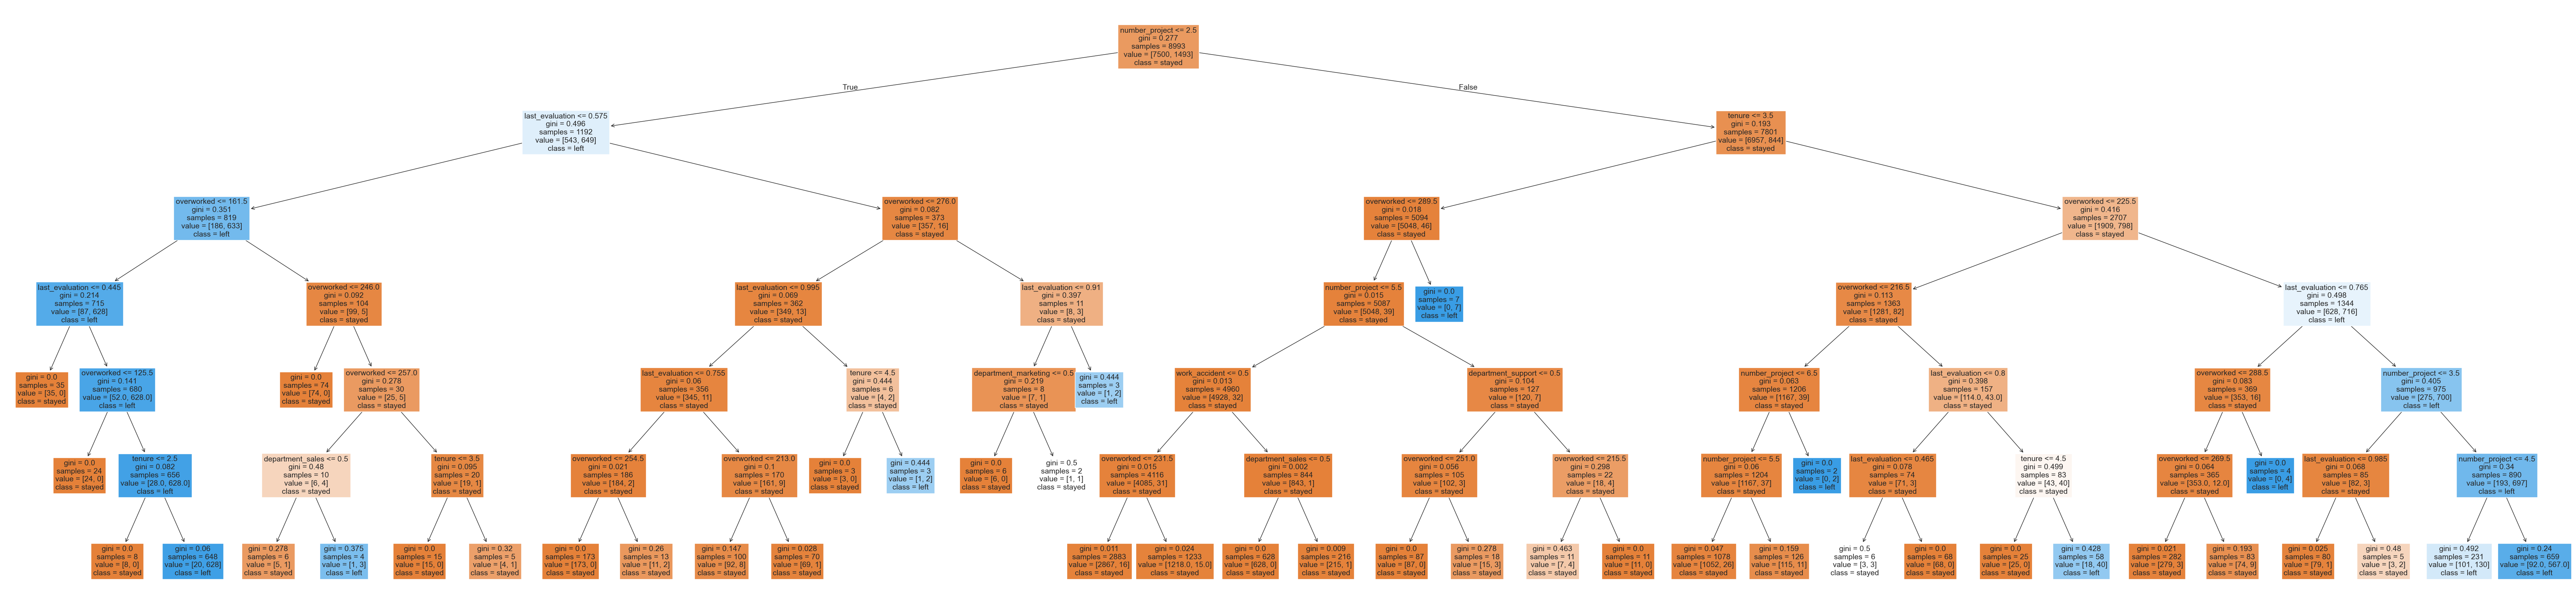

In [97]:
plt.figure(figsize = (85, 20))
plot_tree(tree2.best_estimator_, max_depth = 6, feature_names = X.columns, 
          class_names = {0:'stayed', 1:'left'}, filled = True, fontsize = 14)
plt.show();

#### Decison tree feature importance.

In [98]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                               columns = ['gini_importance'], 
                               index = X.columns)
tree2_importances = tree2_importances.sort_values(by = 'gini_importance', ascending = False)

# Only extracting the features with importances > 0

tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.305077
number_project               0.264253
overworked                   0.264168
tenure                       0.164812
department_sales             0.000840
department_support           0.000438
department_marketing         0.000384
work_accident                0.000029

Next, we visualise a bar plot to visualise the decision tree feature importances. 

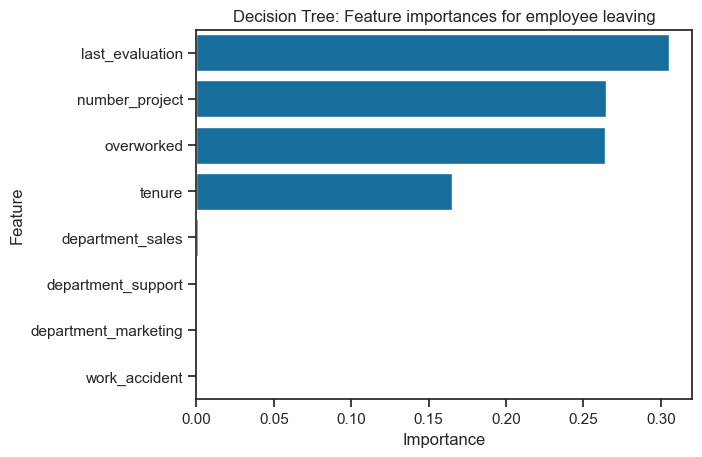

In [99]:
sns.barplot(data = tree2_importances, x = 'gini_importance', y = tree2_importances.index, orient = 'h')
plt.title('Decision Tree: Feature importances for employee leaving')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

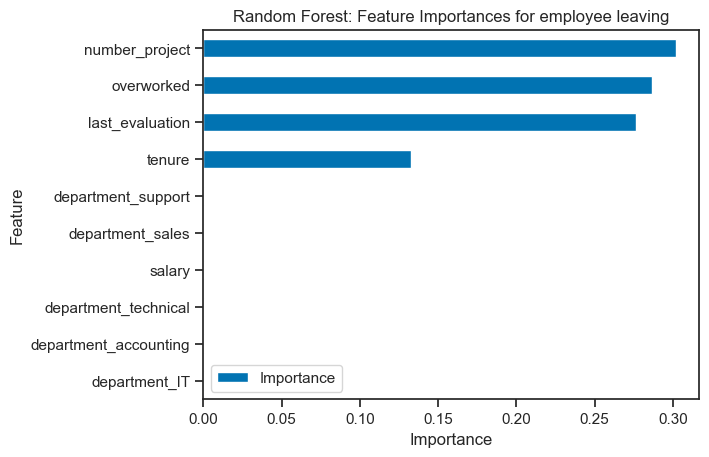

In [100]:
feat_imp = rf2.best_estimator_.feature_importances_

ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

feat = X.columns [ind]

feat_imp = feat_imp[ind]

y_df = pd.DataFrame({'Feature': feat, 'Importance': feat_imp})
y_sort_df = y_df.sort_values('Importance')
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind = 'barh', ax = ax1, x = 'Feature', y = 'Importance')

ax1.set_title('Random Forest: Feature Importances for employee leaving')
ax1.set_xlabel('Importance')
ax1.set_ylabel('Feature')
plt.show()